# Stress and Sleep Hours

In [9]:
import pandas as pd

# Load the datasets
stress_data = pd.read_csv('./EMA/stress.csv')
sleep_data = pd.read_csv('./EMA/sleep_hours.csv')

# Display the first few rows of each dataset and their column names
(stress_data.head(), stress_data.columns, sleep_data.head(), sleep_data.columns)


(            day  level  uid
 0    2013-03-27    1.0  u04
 1  2013-03-27.1    4.0  u04
 2    2013-03-28    1.0  u04
 3    2013-03-29    2.0  u04
 4  2013-03-29.1    1.0  u04,
 Index(['day', 'level', 'uid'], dtype='object'),
           day  hours  uid
 0    27/03/13      6  u04
 1    28/03/13      7  u04
 2  28/03/13.1      6  u04
 3    29/03/13      6  u04
 4    30/03/13      7  u04,
 Index(['day', 'hours', 'uid'], dtype='object'))

In [10]:
# Extract unique user IDs from both datasets
unique_uids = pd.concat([stress_data['uid'], sleep_data['uid']]).unique()

# Calculate the average stress level and sleep hours for each uid
average_stress = stress_data.groupby('uid')['level'].mean().reset_index()
average_sleep = sleep_data.groupby('uid')['hours'].mean().reset_index()

# Merge the average values into a single DataFrame on 'uid'
merged_data = pd.merge(average_stress, average_sleep, on='uid', how='inner')
merged_data.columns = ['uid', 'average_stress_level', 'average_sleep_hours']

# Remove rows with NaN values
cleaned_data = merged_data.dropna()


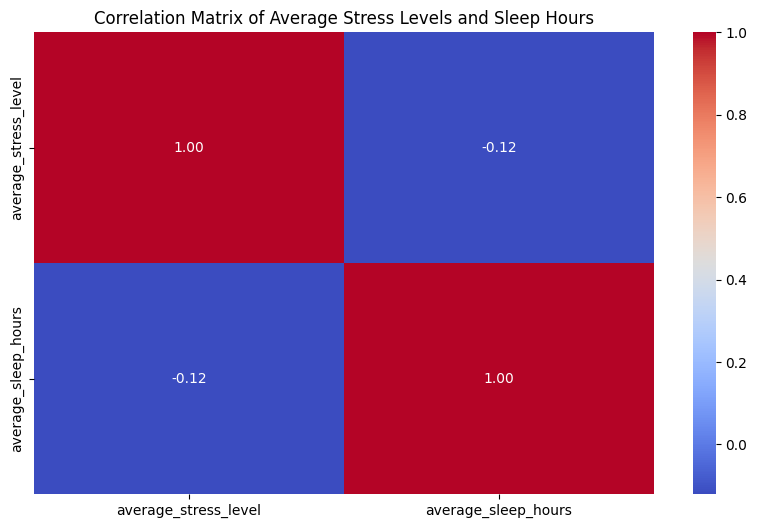

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix plot
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(cleaned_data[['average_stress_level', 'average_sleep_hours']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Average Stress Levels and Sleep Hours')
plt.show()


# Stress and Sleep Quality

In [12]:
stress_data = pd.read_csv('./EMA/stress.csv')
sleep_data = pd.read_csv('./EMA/sleep_qual.csv')

stress_data = stress_data.dropna()
sleep_data = sleep_data.dropna()

# Calculate the average stress level and sleep quality rate for each uid
average_stress = stress_data.groupby('uid')['level'].mean().reset_index()
average_sleep_quality = sleep_data.groupby('uid')['rate'].mean().reset_index()

# Merge the average values into a single DataFrame on 'uid'
merged_data = pd.merge(average_stress, average_sleep_quality, on='uid', how='inner')
merged_data.columns = ['uid', 'average_stress_level', 'average_sleep_quality']

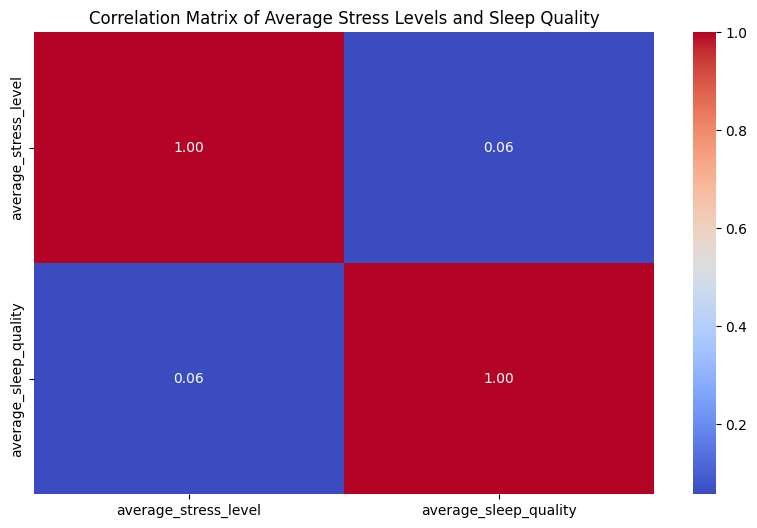

In [15]:
from scipy.stats import pearsonr

plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(merged_data[['average_stress_level', 'average_sleep_quality']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Average Stress Levels and Sleep Quality')
plt.show()

# Sleep Hours and PSS

In [16]:
# Load the new datasets for sleep hours and pre-intervention stress scores
sleep_hours_data = pd.read_csv('./EMA/sleep_hours.csv')
pss_pre_data = pd.read_csv('./data/PSS/PSS_Pre.csv')

# Display the first few rows of each dataset and their column names
(sleep_hours_data.head(), sleep_hours_data.columns, pss_pre_data.head(), pss_pre_data.columns)

(          day  hours  uid
 0    27/03/13      6  u04
 1    28/03/13      7  u04
 2  28/03/13.1      6  u04
 3    29/03/13      6  u04
 4    30/03/13      7  u04,
 Index(['day', 'hours', 'uid'], dtype='object'),
    uid type  \
 0  u00  Pre   
 1  u01  Pre   
 2  u02  Pre   
 3  u03  Pre   
 4  u04  Pre   
 
    1. In the last month, how often have you been upset because of something that happened unexpectedly?  \
 0                                                  2                                                      
 1                                                  2                                                      
 2                                                  3                                                      
 3                                                  2                                                      
 4                                                  1                                                      
 
    2. In the last month, how often have

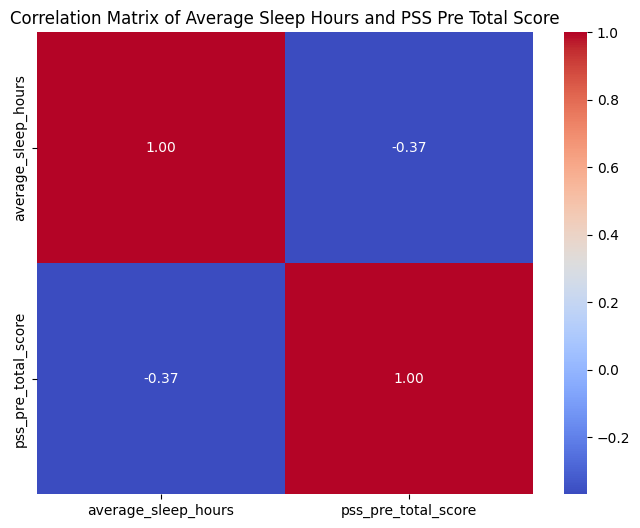

In [19]:
# Calculate the average sleep hours per user
average_sleep = sleep_hours_data.groupby('uid')['hours'].mean().reset_index()

# Since PSS_Pre data already contains a 'total_score' column, we'll use it directly
pss_pre_scores = pss_pre_data[['uid', 'total_score']].dropna()

# Merge the average sleep hours with the PSS scores on 'uid'
merged_data_pss_sleep = pd.merge(average_sleep, pss_pre_scores, on='uid', how='inner')
merged_data_pss_sleep.columns = ['uid', 'average_sleep_hours', 'pss_pre_total_score']

# Perform correlation analysis using Pearson's method
correlation_pss_sleep = merged_data_pss_sleep[['average_sleep_hours', 'pss_pre_total_score']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_pss_sleep, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Average Sleep Hours and PSS Pre Total Score')
plt.show()

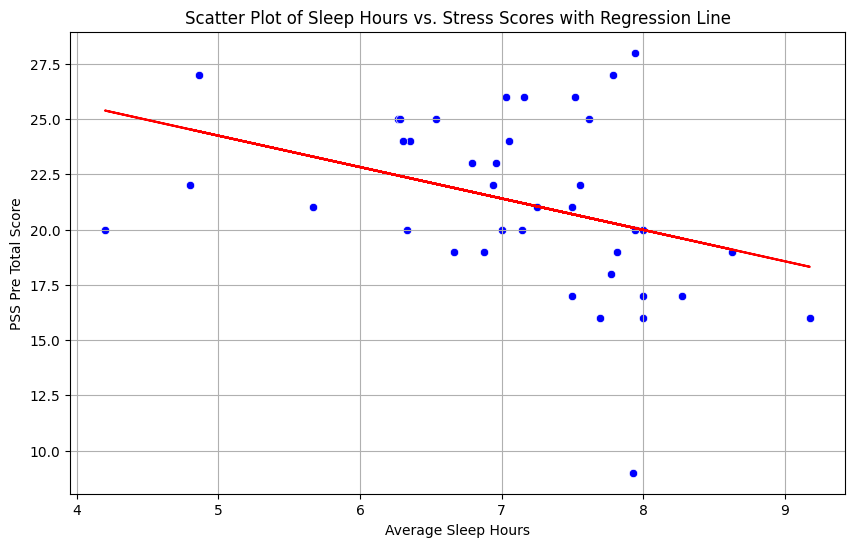

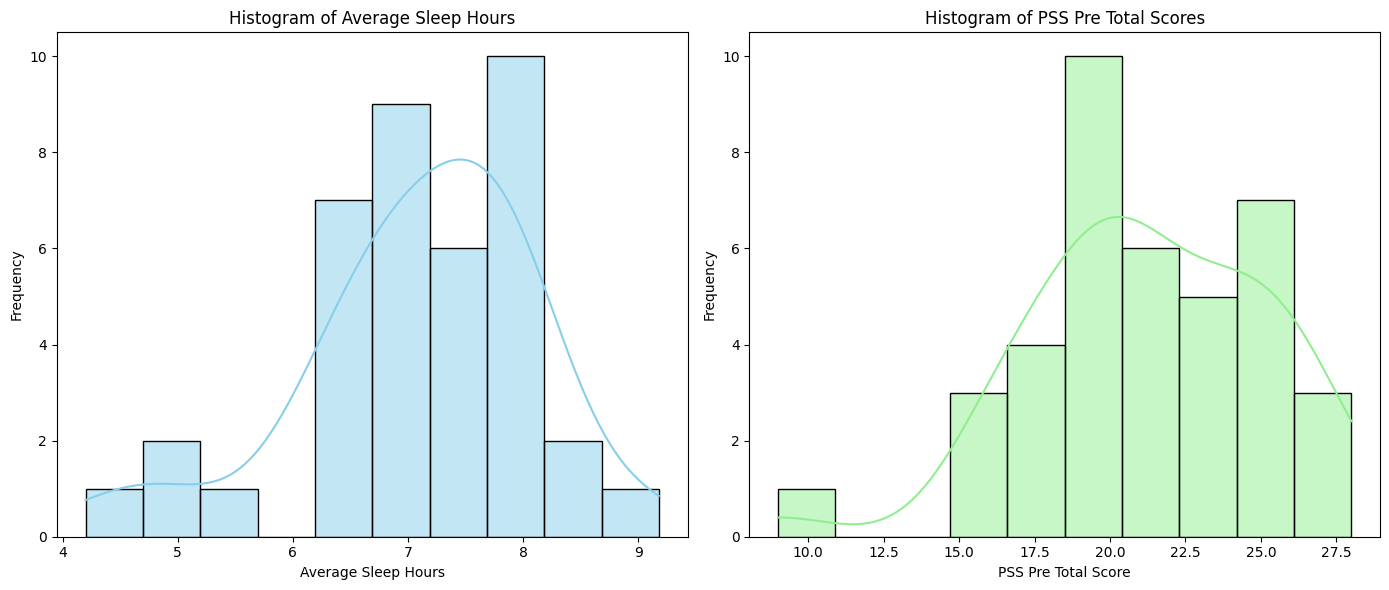

In [18]:
from scipy.stats import linregress

# Scatter plot with linear regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data_pss_sleep, x='average_sleep_hours', y='pss_pre_total_score', color='blue')
slope, intercept, r_value, p_value, std_err = linregress(merged_data_pss_sleep['average_sleep_hours'], merged_data_pss_sleep['pss_pre_total_score'])
line = slope * merged_data_pss_sleep['average_sleep_hours'] + intercept
plt.plot(merged_data_pss_sleep['average_sleep_hours'], line, color='red')  # Red line for the linear regression model
plt.title('Scatter Plot of Sleep Hours vs. Stress Scores with Regression Line')
plt.xlabel('Average Sleep Hours')
plt.ylabel('PSS Pre Total Score')
plt.grid(True)
plt.show()

# Histograms for both variables
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(merged_data_pss_sleep['average_sleep_hours'], bins=10, kde=True, ax=ax[0], color='skyblue')
ax[0].set_title('Histogram of Average Sleep Hours')
ax[0].set_xlabel('Average Sleep Hours')
ax[0].set_ylabel('Frequency')

sns.histplot(merged_data_pss_sleep['pss_pre_total_score'], bins=10, kde=True, ax=ax[1], color='lightgreen')
ax[1].set_title('Histogram of PSS Pre Total Scores')
ax[1].set_xlabel('PSS Pre Total Score')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [20]:
correlation_coefficient, p_value = pearsonr(merged_data_pss_sleep['average_sleep_hours'], merged_data_pss_sleep['pss_pre_total_score'])

# Print Pearson's correlation coefficient and p-value
print(f"Pearson's correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson's correlation coefficient: -0.3683605619685322
P-value: 0.0210345018462861


# Sleep Quality and PSS

In [21]:
# Load the sleep quality data
sleep_quality_data = pd.read_csv('./EMA/sleep_qual.csv')

# Display the first few rows of the sleep quality data and their column names
sleep_quality_data.head(), sleep_quality_data.columns


(          day  rate  uid
 0  2013-03-27   2.0  u04
 1  2013-03-28   2.0  u04
 2  2013-03-29   2.0  u04
 3  2013-03-30   3.0  u04
 4  2013-03-31   3.0  u04,
 Index(['day', 'rate', 'uid'], dtype='object'))

In [22]:
# Calculate the average sleep quality per user
average_sleep_quality = sleep_quality_data.groupby('uid')['rate'].mean().reset_index()

# We already have the PSS pre-intervention scores loaded as 'pss_pre_scores'
# Merging the average sleep quality with PSS pre-intervention stress scores
merged_data_quality_pss = pd.merge(average_sleep_quality, pss_pre_scores, on='uid', how='inner')
merged_data_quality_pss.columns = ['uid', 'average_sleep_quality', 'pss_pre_total_score']

# Display the merged data for confirmation
merged_data_quality_pss.head()


,uid,average_sleep_quality,pss_pre_total_score
0,u00,1.968750,26.0
1,u01,1.550000,21.0
2,u02,2.066667,19.0
3,u03,1.785714,9.0
4,u04,2.100000,19.0


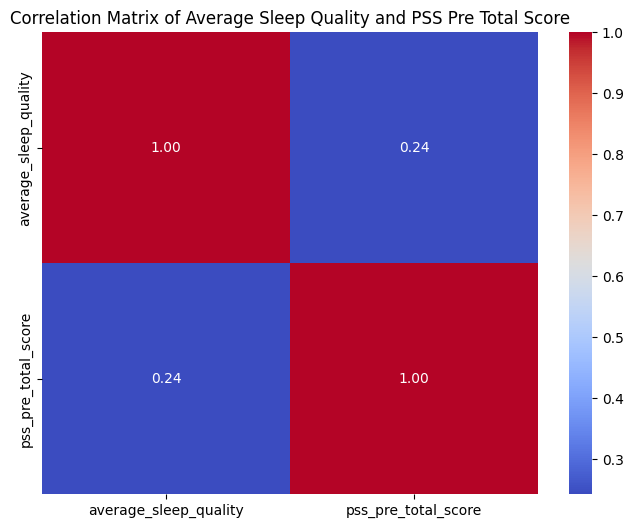

(0.2427816991229381, 0.13642804317733845)

In [23]:
# Compute the correlation matrix for the merged data
correlation_matrix_quality_pss = merged_data_quality_pss[['average_sleep_quality', 'pss_pre_total_score']].corr()

# Display the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_quality_pss, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Average Sleep Quality and PSS Pre Total Score')
plt.show()

# Perform Pearson's correlation test
correlation_coefficient_quality_pss, p_value_quality_pss = pearsonr(merged_data_quality_pss['average_sleep_quality'], merged_data_quality_pss['pss_pre_total_score'])

# Print Pearson's correlation coefficient and p-value
correlation_coefficient_quality_pss, p_value_quality_pss


# Sleep Hours and PHQ-9

In [24]:
# Load the new stress data and the PHQ-9 pre-intervention data
phq9_pre_data = pd.read_csv('./data/PHQ-9/PHQ-9_Pre.csv')

# Display the first few rows of each dataset and their column names
(phq9_pre_data.head(), phq9_pre_data.columns)


(   uid type  Little interest or pleasure in doing things  \
 0  u00  Pre                                            0   
 1  u01  Pre                                            1   
 2  u02  Pre                                            2   
 3  u03  Pre                                            0   
 4  u04  Pre                                            1   
 
    Feeling down, depressed, hopeless.  \
 0                                   1   
 1                                   1   
 2                                   1   
 3                                   1   
 4                                   1   
 
    Trouble falling or staying asleep, or sleeping too much.  \
 0                                                  0          
 1                                                  1          
 2                                                  2          
 3                                                  0          
 4                                                  0     

In [25]:
# Use the 'total_score' directly from the PHQ-9 Pre data
phq9_pre_scores = phq9_pre_data[['uid', 'total_score']].dropna()


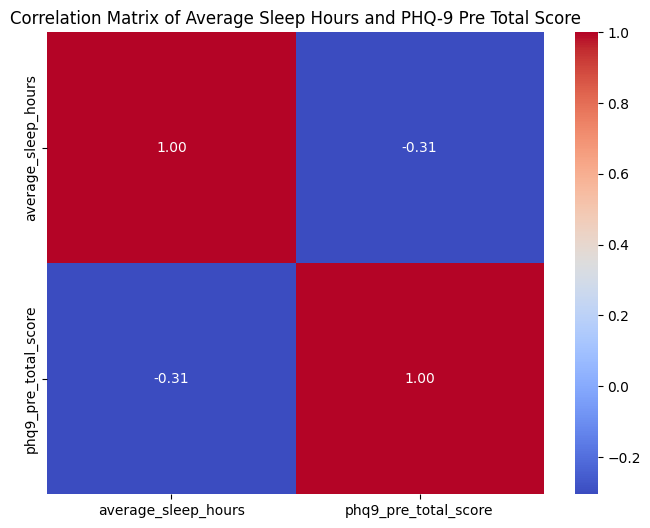

(-0.3051181590334383, 0.06249896695725178)

In [26]:
# We previously calculated average sleep hours as 'average_sleep'
# Merging the average sleep hours with PHQ-9 pre-intervention depression scores
merged_data_sleep_phq9 = pd.merge(average_sleep, phq9_pre_scores, on='uid', how='inner')
merged_data_sleep_phq9.columns = ['uid', 'average_sleep_hours', 'phq9_pre_total_score']

# Compute the correlation matrix for the merged data
correlation_matrix_sleep_phq9 = merged_data_sleep_phq9[['average_sleep_hours', 'phq9_pre_total_score']].corr()

# Display the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_sleep_phq9, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Average Sleep Hours and PHQ-9 Pre Total Score')
plt.show()

# Perform Pearson's correlation test
correlation_coefficient_sleep_phq9, p_value_sleep_phq9 = pearsonr(merged_data_sleep_phq9['average_sleep_hours'], merged_data_sleep_phq9['phq9_pre_total_score'])

# Print Pearson's correlation coefficient and p-value
correlation_coefficient_sleep_phq9, p_value_sleep_phq9


The correlation matrix between average sleep hours and pre-intervention PHQ-9 depression scores shows a correlation coefficient of 
−0.305. This indicates a moderate negative association, suggesting that higher sleep hours might be associated with lower depression scores as measured by the PHQ-9.

The p-value for this correlation is approximately 
0.062, which is slightly above the conventional alpha level of 
0.05. This means that the correlation is not statistically significant at the 0.05 level, although it's quite close, suggesting a potential trend that might become significant with a larger sample size or additional data.